# POP77001 Final Project: K-means clustering

## Overview

In the final project we will be putting together the topics covered
throughout the module. You will write several functions and apply them
to a real-world dataset.

You will be asked to implement a number of functions that altogether can
do naive [k-means
clustering](https://en.wikipedia.org/wiki/K-means_clustering). K-means
clustering is available as a built-in routine or functionality provided
by external libraries in both R and Python. However, here, instead of
relying on these pre-existing tools, we will write our own solution to
help illuminate the workings of one of the most basic unsupervised
machine learning algorithms and how it can be applied to real world
data.

As our dataset you will be analysing [Airbnb listings in Dublin (from 7
September
2023)](http://data.insideairbnb.com/ireland/leinster/dublin/2023-09-07/data/listings.csv.gz).
This data was collected by [Inside Airbnb](http://insideairbnb.com),
independent project to assess the impact of Airbnb platform on urban
living.

You can use either Python or R to implement your solutions. Solutions
that mix Python and R code (either within one part or across parts) will
not be accepted.

Keep your functions simple and streamlined. Do not ‘overengineer’ your
solutions (especially when implementing k-means algorithm). Do not use
external libraries other than those specified for each part.

## Part 1: Calculate Distance

Write a function called `get_distance` that finds the [Euclidean
distance](https://en.wikipedia.org/wiki/Euclidean_distance) between two
points.

Function takes 2 arguments:

-   `p` - sequence of first point’s coordinates (in n dimensions)
-   `q` - sequence of second point’s coordinates (in n dimensions)

Function returns 1 object:

-   `dist` - floating-point value representing the Euclidean distance
    between the input points

Example input → output:

-   $[5, 1, 3, 12, 7]$ and $[10, 8, 3, 9, 11]$ → $9.9499$

External libraries:

-   None

In [64]:
# Part 1:

# Your code goes here

def get_distance(p, q):
    """
    This function is used to finds the Euclidean distance.

    Arguments:
    - p: sequence of first point's coordinates (in n dimensions)
    - q: sequence of second point's coordinates (in n dimensions)

    Return:
    - dist: floating-point value representing the Euclidean distance between the input points
    """

    # Make sure p and q have the same dimensions
    if len(p) != len(q):
        raise ValueError("Input points must have the same number of dimensions")

    # Calcuate sum suqared differences
    squared_diff = [(pi - qi) ** 2 for pi, qi in zip(p, q)]
    sum_squared_diff = sum(squared_diff)

    # Calculate dist
    dist = sum_squared_diff ** 0.5
    
    return round(dist, 4)

# Test the result with example input and output
ex_p = [5, 1, 3, 12, 7]
ex_q = [10, 8, 3, 9, 11]
eudis_pq = get_distance(ex_p, ex_q)

# Print the result
print(eudis_pq)

9.9499


## Part 2: Calculate Centroid

Write a function called `get_centroid` that finds the centroid of
multiple points in n dimensions. The function should take some sequence
(e.g. list in Python or R) as an input and return the centroid of these
points.

Function takes 1 argument:

-   `points` - sequence of points’ coordinates (in n dimensions)

Function returns 1 object:

-   `centroid` - sequence of centroid’s coordinates (in n dimensions)

Example input → output:

-   $[[0,1,2,3,4], [5,6,7,8,9]]$ → $[2.5, 3.5, 4.5, 5.5, 6.5]$

External libraries:

-   None

In [65]:
# Part 2:

# Your code goes here

def get_centroid(points):
    """
    This function is used to find the centroid of multiple points in n dimensions.

    Argument:
    - points: sequence of points' coordinates (in n dimensions)

    Return:
    - centroid: sequence of centroid's coordinates (in n dimensions)
    """

    # Make sure points list is not empty
    if not points:
        raise ValueError("Input list of points is empty")
    # Make sure points list is a list
    if not isinstance(points, list):
        raise TypeError("Input must be a list of points")
    # Make sure points list element is int or float
    for point in points:
        if any(not isinstance(coord, (int, float)) for coord in point):
            raise TypeError("Coordinates must be numeric values")
    
    # Make sure points list element has the same dimensions
    dim = len(points[0])
    if any(len(point) != dim for point in points):
        raise ValueError("All points must have the same number of dimensions")

    # Initialize the centroid coordinates to zero
    centroid = [0] * dim

    # Sum the coordinates of all points
    for point in points:
        centroid = [ci + xi for ci, xi in zip(centroid, point)]

    # Calculate the average by dividing each coordinate by the number of points
    centroid = [ci / len(points) for ci in centroid]

    return centroid

# Example usage
points = [[0, 1, 2, 3, 4], [5, 6, 7, 8, 9]]
centroid = get_centroid(points)
print(centroid)

[2.5, 3.5, 4.5, 5.5, 6.5]


## Part 3: K-means Algorithm

Write that a function called `k_means` that implements K-means
algorithm. The general functioning of the algorithm is as follows:

-   A random set of k points are picked as cluster centroids
-   The distance between each input point and each centroid is
    calculated (use `get_distance()` function from above)
-   Each point is assigned to a cluster, whose centroid is the closest
-   New cluster centroids are calculated (use `get_centroid()` function
    from above)
-   Repeat until convergence (stopping rule)
-   Stopping rule can be implemented in 2 different ways:
    -   Cluster assignments stop changing
    -   Manually specified number of iterations (optionally exposed as
        an argument)

Function takes 2 arguments:

-   `points` - sequence of points’ coordinates (in n dimensions)
-   `k` - number of clusters

Function returns 1 object:

-   `clusters` - sequence of points’ assignments to clusters (the order
    should correspond to the order of points’ coordinates in the input
    sequence)

Print out:

-   `centroids` - coordinates of final centroids after algorithm’s
    convergence

Example input → output:

-   $[[0,1,2,3,4], [1,2,3,4,5], [5,6,7,8,9]]$ and $2$ → $[1, 1, 2]$ or
    $[2, 2, 1]$  
    (output cluster numbers in Python could also be $[0, 0, 1]$ or
    $[1, 1, 0]$)

-   Centroids: $[[0.5, 1.5, 2.5, 3.5, 4.5], [5.0, 6.0, 7.0, 8.0, 9.0]]$

External libraries:

-   None for R
-   `sample()` method from `random` built-in module for Python to
    initialize the first random centroids

In [66]:
# Part 3:

# Your code goes here

# Import necessary package
import random

def k_means(points, k, max_iterations = None):
    """
    This function is used to calculate k means algorithm.

    Arguments:
    - points: sequence of points' coordinates (in n dimensions)
    - k: number of clusters

    Return:
    - clusters: sequence of points' assignments to clusters (the order should correspond to the order of points' coordinates in the input sequence)
    """

    # Make sure k is a positive integer
    if not isinstance(k, int) or k <= 0:
        raise ValueError("Number of clusters (k) must be a positive integer")

    # Make sure k is less than the number of input points
    num_points = len(points)
    if num_points < k:
        raise ValueError("Number of clusters (k) must be less than or equal to the number of points")
    
    # Select a random point as the initial center of cluster
    centroids = random.sample(points, k) 
    # Make every point as class 0 as the beginning
    clusters = [0] * num_points
    # Start the iterations progress
    iterations = 0
    
    while True:
        # Assign each point to the closest centroid
        for i, point in enumerate(points):
            distances = [get_distance(point, centroid) for centroid in centroids]
            clusters[i] = distances.index(min(distances))

        # Calculate new centroids based on current assignments
        new_centroids = [get_centroid([points[j] for j in range(num_points) if clusters[j] == c]) for c in range(k)]

        # Check for convergence
        if new_centroids == centroids or (max_iterations is not None and iterations >= max_iterations):
            break

        # Update centroids and continue
        centroids = new_centroids
        iterations += 1

    print("Centroids:", centroids)
    return clusters

# Example usage
points = [[0, 1, 2, 3, 4], [1, 2, 3, 4, 5], [5, 6, 7, 8, 9]]
k = 2
clusters = k_means(points, k)
print("Clusters:", clusters)

Centroids: [[5.0, 6.0, 7.0, 8.0, 9.0], [0.5, 1.5, 2.5, 3.5, 4.5]]
Clusters: [1, 1, 0]


## Part 4: K-means Clustering

-   Load the Airbnb Dublin dataset either using a downloaded file stored
    on your local machine or by reading it in directly using one of the
    2 URLs below:

    -   `http://data.insideairbnb.com/ireland/leinster/dublin/2023-09-07/data/listings.csv.gz`

-   Apply `k_means()` function implemented above to listings’
    coordinates (stored in columns ‘longitude’ and ‘latitude’) of the
    Airbnb Dublin dataset. Fit the algorithm with $k = 3$ and $k = 5$
    settings.

    -   For replication purposes set the seed before running `k_means()`
        function as the initial random centroid selection can affect
        your results.
    -   In Python use `random.seed(2023)` from `random` module
    -   In R use `set.seed(2023)` available as built-in function

-   How many listings fall into each cluster?

-   Use [online map](https://www.openstreetmap.org/) to position the
    geographic locations of centroids. Where in Dublin are they,
    roughly, located?

-   Add 2 new columns to the dataset with cluster assignments (for 3 and
    5 clusters) for each listing.

-   Save the updated dataset as a CSV file on your local machine.

External libraries:

-   Optionally, `readr` for R
-   `pandas` for Python

In [67]:
import pandas as pd

# Set a seed for reproducibility
random.seed(2023)

# Load Airbnb Dublin dataset
url = "http://data.insideairbnb.com/ireland/leinster/dublin/2023-09-07/data/listings.csv.gz"
df = pd.read_csv(url)

# Extract latitude and longitude columns
coordinates = df[['latitude', 'longitude']]

# Define the number of clusters (k)
k_values = [3, 5]

"""
-   How many listings fall into each cluster?
"""

# Apply k_means function for each k value
for k in k_values:
    clusters = k_means(coordinates.values.tolist(), k)

    """
    -   Add 2 new columns to the dataset with cluster assignments (for 3 and 5 clusters) for each listing.
    """
    df[f"cluster_{k}"] = clusters

# Display the number of listings in each cluster
for k in k_values:
    print(f"Number of listings in each cluster (k={k}):")
    print(df[f"cluster_{k}"].value_counts())
    print()

"""
-   Use [online map] to position the geographic locations of centroids. 
    Where in Dublin are they, roughly, located?

Answers: 

*   Cluster 3: 
    0) Bóthar na Life, Palmerstown West DED 1986, South Dublin, County Dublin, Leinster, D20 VP26, Ireland 
    1) Causeway Road, Clontarf East B ED, Dublin, Dublin 3, Leinster, D13 F85P, Ireland
    2) Grafton Street, Mansion House B Ward 1986, Dublin, County Dublin, Leinster, D02 ET99, Ireland

*   Cluster 5:
    0) Chalfont, Malahide-West DED 1986, Malahide, Fingal, County Dublin, Leinster, K36 CH99, Ireland
    1) Marrowbone Lane, Merchants Quay C Ward 1986, Dublin, County Dublin, Leinster, D08 VF83, Ireland
    2) Sir John Rogerson's Quay, Dublin Docklands, South Dock ED, Dublin, County Dublin, Leinster, D02 KV60, Ireland
    3) Fonthill Business Park, Lucan-Esker DED 1986, South Dublin, County Dublin, Leinster, D22 A0C1, Ireland 
    4) 48, Clonkeen Road, Clonkeen, Deansgrange, Cabinteely-Pottery DED 1986, Cornelscourt, Dún Laoghaire-Rathdown, County Dublin, Leinster, A94 HD21, Ireland
"""

"""
-   Save the updated dataset as a CSV file on your local machine.
"""

df.to_csv('airbnb_dublin_clusters.csv', index=False)

Centroids: [[53.348846924136225, -6.391569975431786], [53.36287936309877, -6.149440908868048], [53.34220235432087, -6.259806631605456]]
Centroids: [[53.45210053494275, -6.1648602343928935], [53.34038924335654, -6.2822514605067195], [53.34598659666205, -6.239919872632082], [53.3510096092596, -6.4058501289725465], [53.27624144805663, -6.162204525438387]]
Number of listings in each cluster (k=3):
2    6779
1    1226
0     719
Name: cluster_3, dtype: int64

Number of listings in each cluster (k=5):
1    3521
2    3164
4     803
0     659
3     577
Name: cluster_5, dtype: int64



## Part 5: Data Analysis

-   Load the the Airbnb Dublin dataset as a CSV file from your local
    machine.

-   Calculate median and mean prices by each cluster (column ‘price’).
    Do you find any difference between the two measures?

-   Count number of different types of accommodation by each cluster
    (column ‘room_type’). Are there any differences across clusters?

-   Try plotting the positions of listings (using longitude as x-axis
    and latitude as y-axis) and colouring the points by cluster
    assignment. Here you can pick any language or library (base R
    `plot()` from Week 12, `ggplot()` for R; built-in plotting facility
    of `pandas`, `matplotlib`, `seaborn`, `plotnine` for Python)

External libraries: - Optionally, `readr`, `dplyr`, `stringr` for R
(+`ggplot2` for plotting) - `pandas`, optionally, `regex` for Python (+
`matplotlib`/`seaborn`/`plotnine` for plotting)

The mean price of cluster_3 is:  cluster_3
0.0    114.907692
1.0    160.423743
2.0    162.497750
Name: price, dtype: float64
The median price of cluster_3 is:  cluster_3
0.0     82.0
1.0    120.0
2.0    120.0
Name: price, dtype: float64
The mean price of cluster_5 is:  cluster_5
0.0    141.159509
1.0    157.682240
2.0    171.367360
3.0    109.050435
4.0    158.711779
Name: price, dtype: float64
The median price of cluster_5 is:  cluster_5
0.0    100.0
1.0    120.0
2.0    125.0
3.0     80.0
4.0    127.0
Name: price, dtype: float64
Room Type Counts by Cluster 3:
cluster_3          0.0    1.0     2.0
room_type                            
Entire home/apt  244.0  675.0  3630.0
Hotel room         0.0    1.0    21.0
Private room     464.0  545.0  2989.0
Shared room       11.0    5.0   138.0

Room Type Counts by Cluster 5:
cluster_5          0.0     1.0     2.0    3.0    4.0
room_type                                           
Entire home/apt  286.0  1884.0  1719.0  171.0  489.0
Hotel room    

/var/folders/g0/3n5mnqn17wlb0mtr7jqy_53c0000gn/T/ipykernel_56884/841103225.py:7: DtypeWarning: Columns (2,22,41,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("airbnb_dublin_clusters.csv")


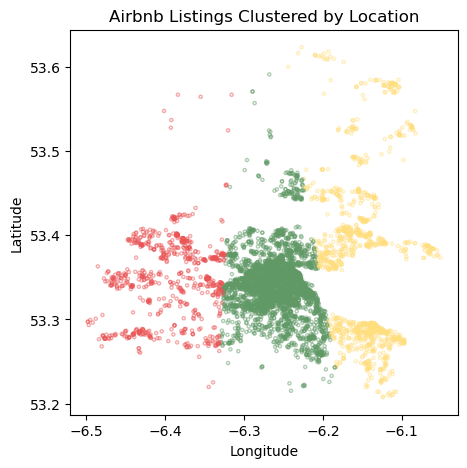

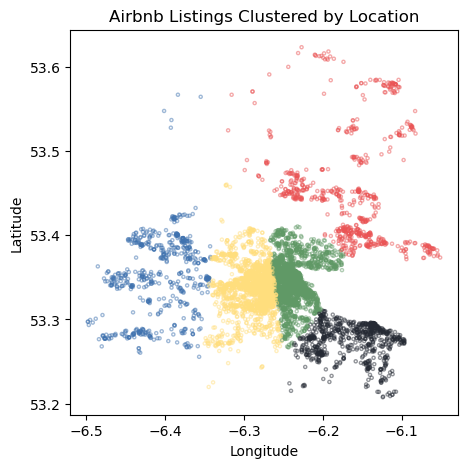

In [68]:
import matplotlib.pyplot as plt

"""
-   Load the Airbnb Data from my machine.
"""

df = pd.read_csv("airbnb_dublin_clusters.csv")

"""
-   Calculate median and mean prices by each cluster.

    To calculate, we need to change price into numeric and remove $ symbols.
    And secondly, I write a for loop to shorten my code.
"""

# Data Tidy -> Change price into numeric and remove $ symbols.
df["price"] = pd.to_numeric(df["price"].replace("[\$,]", " ", regex=True), errors="coerce")

# Calculate 
clus_col = ["cluster_3", "cluster_5"]
for i in clus_col:
    print("The mean price of", i, "is: ", df.groupby(i)["price"].mean())
    print("The median price of", i, "is: ", df.groupby(i)["price"].median())

"""
-   Do you find any difference between the two measures?

    I found no matter which cluster, the mean price is always higher than median price.
    This suggesting that there might be some relatively higher extreme values on the right side of the price distribution, 
    and these extreme values contribute to the increase in the mean.
"""

"""
Count number of different types of accommodation by each cluster (column 'room_type'). 
"""
# Count room types by cluster_3
room_type_counts_cluster_3 = df[df["cluster_3"].notna()].groupby("room_type")["cluster_3"].value_counts().unstack().fillna(0)

# Count room types by cluster_5
room_type_counts_cluster_5 = df[df["cluster_5"].notna()].groupby("room_type")["cluster_5"].value_counts().unstack().fillna(0)

# Display the counts
print("Room Type Counts by Cluster 3:")
print(room_type_counts_cluster_3)

print("\nRoom Type Counts by Cluster 5:")
print(room_type_counts_cluster_5)

"""
-   Are there any differences across clusters?

    For Cluster 3, the dominant room type appears to be "Entire home/apt," followed by "Private room."
    For Cluster 5, "Entire home/apt" is also dominant, but there seems to be a more balanced distribution across room types compared to Cluster 3.
"""

"""
-   Try plotting the positions of listings (using longitude as x-axis and latitude as y-axis) and colouring the points by cluster assignment. 
"""

# data cleanning -> drop na
df_tidy = df.dropna(subset=['cluster_3', 'cluster_5'])
colors_set = {0: "#EA5455", 1:"#FFDE7D", 2:"#609966", 3:"#3F72AF", 4:"#252A34"}

# plotting
for i in clus_col:
    plt.figure(figsize=(5, 5))

    plt.scatter(df_tidy['longitude'], df_tidy['latitude'], 
                s=5, marker="o", facecolors="None", edgecolors=df_tidy[i].map(colors_set), 
                alpha=0.5)

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Airbnb Listings Clustered by Location')
    plt.show()

## Before submission

-   Do not use external libraries unless explicitly specified.
-   Make sure that you can run all cells without errors.
-   You can do it by clicking `Kernel`, `Restart & Run All` in the menu
    above.
-   Make sure that you save the output by pressing Command+S / CTRL+S.
-   Rename the file from `final_project.ipynb` to
    `final_project_firstname_lastname.ipynb`.

## Submission

-   Submit your Jupyter notebook on Blackboard
-   Due at 23:59 on Friday, 15th December 2023